### 1. Efficient Python programming for lists of same-type objects:

a) Find an efficient way to determine the mean and the position of minimum and maximum values in a long list of random numbers.

In [2]:
# Each of these are easily computed in O(n) time by a linear scan over the list
def mean(lst):
  s = 0
  for x in lst:
    s += x
  return s / len(lst)

def minimum_index(lst):
  min_i = 0
  for i in range(len(lst)):
    if lst[i] < lst[min_i]:
      min_i = i
  return min_i

def maximum_index(lst):
  max_i = 0
  for i in range(len(lst)):
    if lst[i] > lst[max_i]:
      max_i = i
  return max_i

In [3]:
longlist = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]

print(mean(longlist))
print(minimum_index(longlist))
print(maximum_index(longlist))

4.0
1
5


b) Given $N$ random numbers $a_j$, evenly distributed between $-1$ and $1$, find an efficient way to obtain regularized numbers $x_j$ given by $x_j = \bar{a} + \sigma$ for $a_j > \bar{a} + \sigma$; $x_j = \bar{a} - \sigma$ for $a_j < \bar{a} - \sigma$; $x_j = a_j$ else. Here, $\bar{a}$ is the mean value of the sample and $\sigma$ the standard deviation.

In [5]:
# Compute the standard deviation, also returning the mean to avoid redundant work
def mean_and_std(lst):
  m = mean(lst)
  s = 0
  for x in lst:
    s += (x - m)**2
  s = (s / len(lst))**0.5
  return m, s

# First compute the mean and standard deviation in O(n) time, then do one more scan over the list
def regularized(a):
  m, s = mean_and_std(a)
  x = a
  for j in range(len(a)):
    x[j] = min(m + s, max(m - s, a[j]))
  return x

In [6]:
# Regularize the longlist
regularized_list = regularized(longlist.copy())
print("Original list:", longlist)
print("Regularized list:", regularized_list)

Original list: [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]
Regularized list: [3, 1.743695700728935, 4, 1.743695700728935, 5, 6.256304299271065, 2, 6, 5, 3, 5]


### 2. The following 2-qubit circuits shall be programmed using 3 different frameworks: i) using QISkit; ii) using Cirq; iii) using Pennylane; For each circuit extract the final state vector (before any measurement) and create a frequency plot from sampling the circuits (measurement of all qubits) 100 times.
* create a circuit with $H$-gate and $Z$-gate acting on the first qubit and $X$-gate and $H$-gate acting on the second qubit;
* create the Bell states $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ and $\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$
* create the Bell states $\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$ and $\frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$

### i) Qiskit

In [10]:
import qiskit
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from IPython.display import display

print(qiskit.__version__)

1.2.4


In [11]:
def get_statevector_and_measure(circuit):
  backend = Aer.get_backend('statevector_simulator')
  statevector = backend.run(circuit).result().get_statevector()
  circuit.measure([0, 1], [0, 1])
  job = backend.run(circuit, shots=100).result()
  return statevector, job.get_counts()

def circuit_plots(circuit, title = ''):
  statevector, measurement = get_statevector_and_measure(circuit)
  display(circuit.draw(output='mpl'))
  print(statevector)
  display(plot_histogram(measurement, color='midnightblue', title=title))

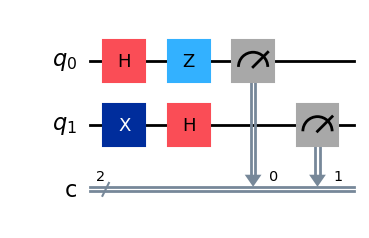

Statevector([ 0.5-6.123234e-17j, -0.5+6.123234e-17j, -0.5+6.123234e-17j,
              0.5-6.123234e-17j],
            dims=(2, 2))


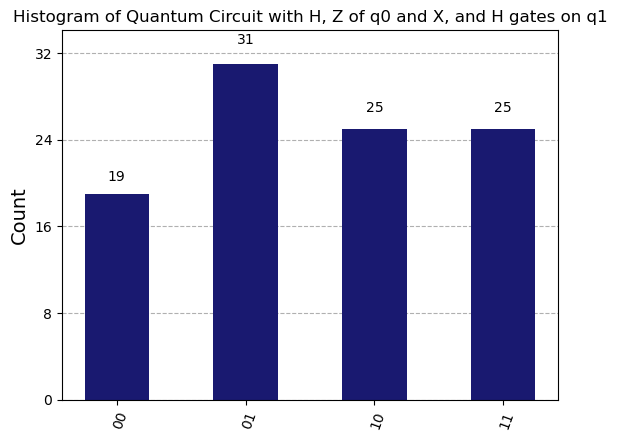

In [12]:
# Create a circuit with H-gate and Z-gate acting on the first
# qubit and X-gate and H-gate acting on the second qubit;
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.z(0)
qc.x(1)
qc.h(1)

circuit_plots(qc, title = 'Histogram of Quantum Circuit with H, Z of q0 and X, and H gates on q1')

##### $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$

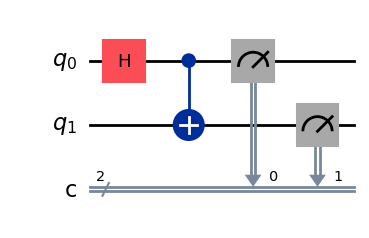

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


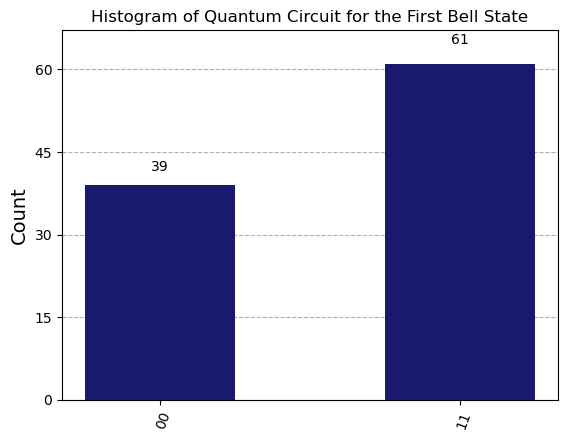

In [13]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

circuit_plots(qc, title = 'Histogram of Quantum Circuit for the First Bell State')

##### $\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$

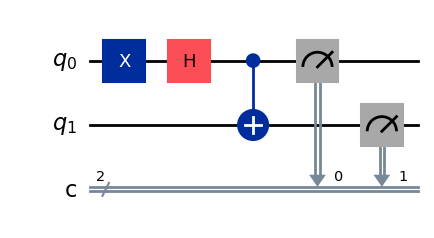

Statevector([ 0.70710678-8.65956056e-17j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j, -0.70710678+8.65956056e-17j],
            dims=(2, 2))


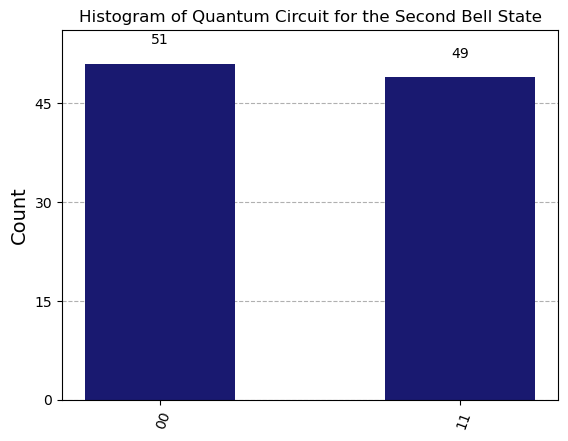

In [14]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.h(0)
qc.cx(0, 1)

circuit_plots(qc, title = 'Histogram of Quantum Circuit for the Second Bell State')

##### $\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$

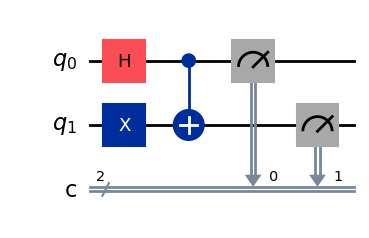

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


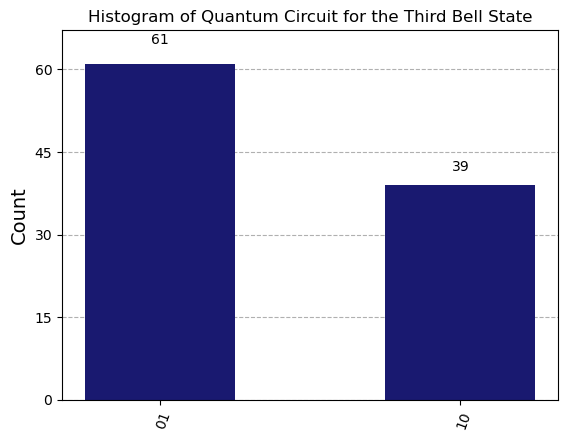

In [15]:
qc = QuantumCircuit(2, 2)
qc.x(1)
qc.h(0)
qc.cx(0, 1)

circuit_plots(qc, title = 'Histogram of Quantum Circuit for the Third Bell State')

##### $\frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$

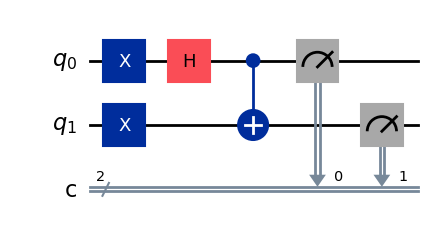

Statevector([ 0.        +0.00000000e+00j, -0.70710678+8.65956056e-17j,
              0.70710678-8.65956056e-17j,  0.        +0.00000000e+00j],
            dims=(2, 2))


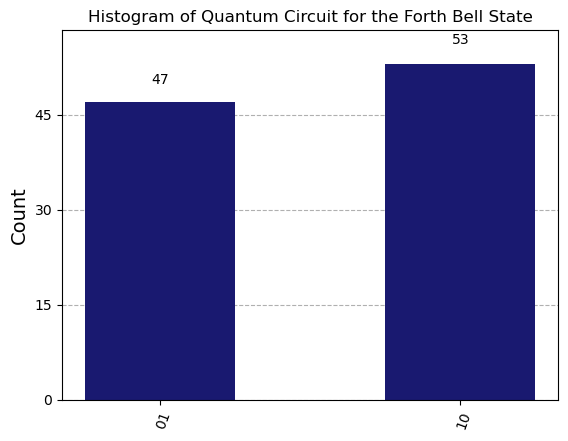

In [16]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.x(1)
qc.h(0)
qc.cx(0, 1)

circuit_plots(qc, title = 'Histogram of Quantum Circuit for the Forth Bell State')

### ii) Cirq

In [25]:
import cirq
import matplotlib.pyplot as plt

print(cirq.__version__)

sim = cirq.Simulator()

def run_cirq(circuit, title = 'Result State Histogram'):
  print(circuit)
  results = sim.simulate(circuit)
  print(results)
  circuit.append(cirq.measure(qubits[0], qubits[1], key='result'))
  samples = sim.run(circuit, repetitions=100)
  cirq.plot_state_histogram(samples, plt.subplot(), title = title)

1.4.1


0: ───H───Z───

1: ───X───H───
measurements: (no measurements)

qubits: (cirq.LineQubit(0),)
output vector: 0.707|0⟩ - 0.707|1⟩

qubits: (cirq.LineQubit(1),)
output vector: 0.707|0⟩ - 0.707|1⟩

phase:
output vector: |⟩


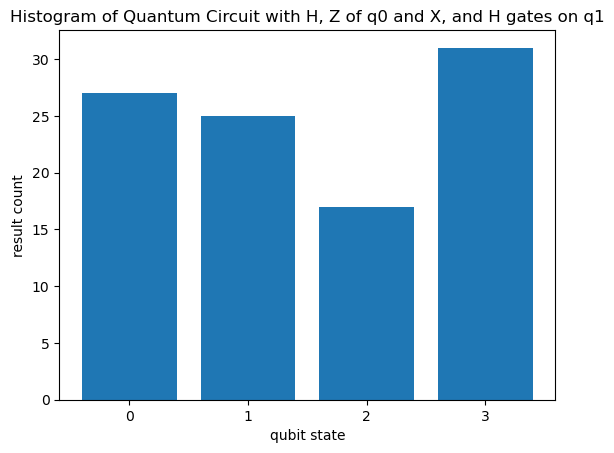

In [26]:
# Create a circuit with H-gate and Z-gate acting on the first
# qubit and X-gate and H-gate acting on the second qubit;
circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(2)

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.Z(qubits[0]))
circuit.append(cirq.X(qubits[1]))
circuit.append(cirq.H(qubits[1]))

run_cirq(circuit, title = 'Histogram of Quantum Circuit with H, Z of q0 and X, and H gates on q1')

In [28]:
def bell_cirq(negate_0, negate_1):
  circuit = cirq.Circuit()
  qubits = cirq.LineQubit.range(2)

  if negate_0:
    circuit.append(cirq.X(qubits[0]))
  if negate_1:
    circuit.append(cirq.X(qubits[1]))

  circuit.append(cirq.H(qubits[0]))
  circuit.append(cirq.CNOT(qubits[0], qubits[1]))
  return circuit

##### $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$

0: ───H───@───
          │
1: ───────X───
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ + 0.707|11⟩

phase:
output vector: |⟩


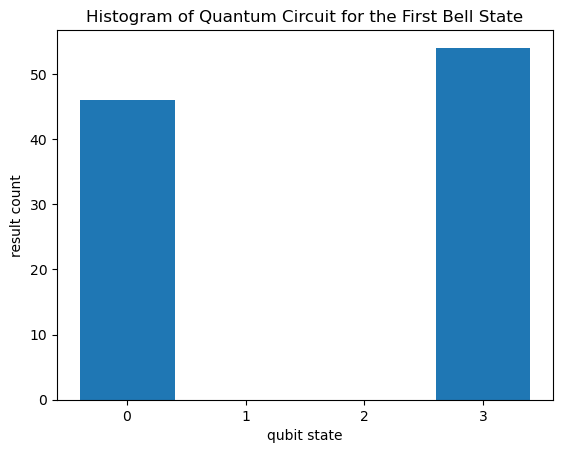

In [29]:
run_cirq(bell_cirq(False, False), title = 'Histogram of Quantum Circuit for the First Bell State')

##### $\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$

0: ───X───H───@───
              │
1: ───────────X───
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ - 0.707|11⟩

phase:
output vector: |⟩


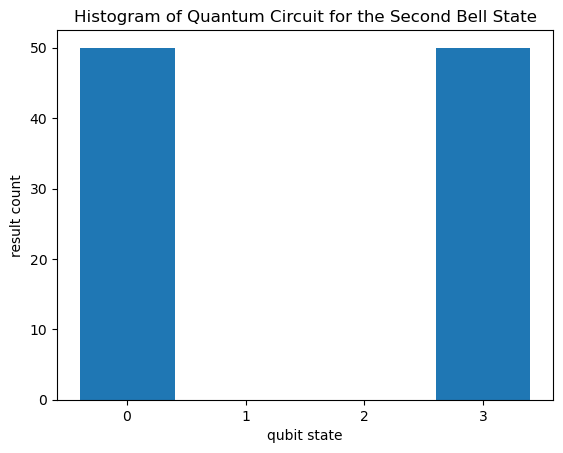

In [30]:
run_cirq(bell_cirq(True, False), title='Histogram of Quantum Circuit for the Second Bell State')

##### $\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$

0: ───H───@───
          │
1: ───X───X───
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|01⟩ + 0.707|10⟩

phase:
output vector: |⟩


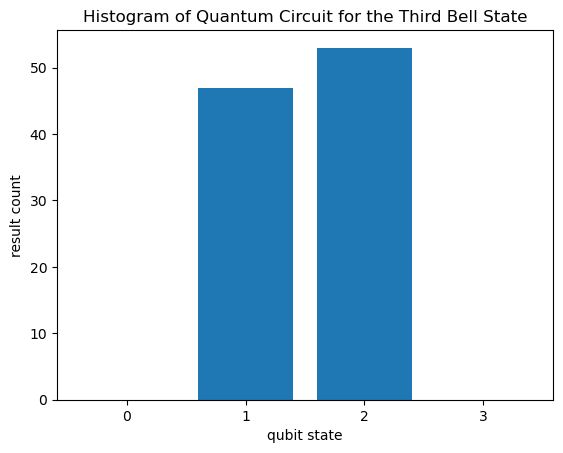

In [31]:
run_cirq(bell_cirq(False, True), title='Histogram of Quantum Circuit for the Third Bell State')

##### $\frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$

0: ───X───H───@───
              │
1: ───X───────X───
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|01⟩ - 0.707|10⟩

phase:
output vector: |⟩


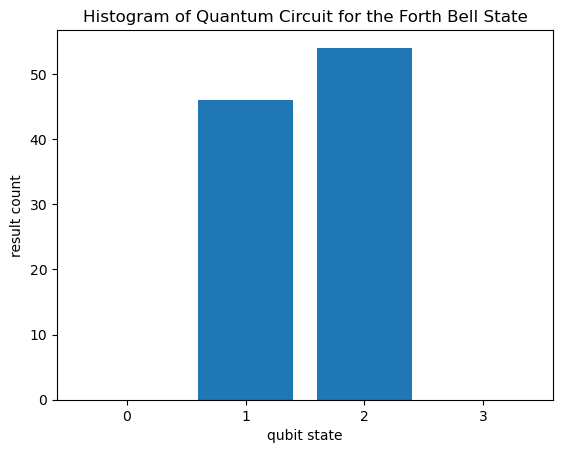

In [32]:
run_cirq(bell_cirq(True, True), title='Histogram of Quantum Circuit for the Forth Bell State')

### iii) Pennylane

In [34]:
import pennylane as qml

print(qml.__version__)

0.39.0


Statevector:  [ 0.5+0.j -0.5+0.j -0.5+0.j  0.5+0.j]

Circuit
(<Figure size 500x300 with 1 Axes>, <Axes: >)


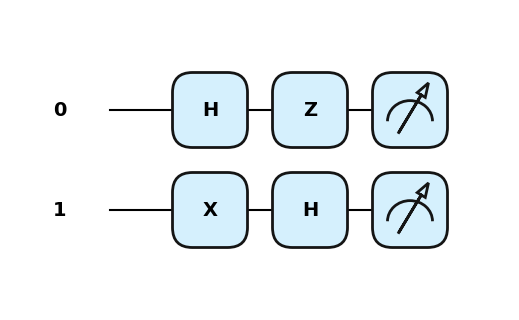

In [35]:
# run on simulator device 'default.qubit'
dev = qml.device("default.qubit", wires=2)

# Create a circuit with H-gate and Z-gate acting on the first
# qubit and X-gate and H-gate acting on the second qubit;
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    qml.PauliX(wires=1)
    qml.Hadamard(wires=1)
    return qml.state()

# Print statevector
statevector = circuit()
print("Statevector: ",  statevector)

print("\nCircuit")
drawer = qml.draw_mpl(circuit)
qml.drawer.use_style('pennylane')
print(drawer())

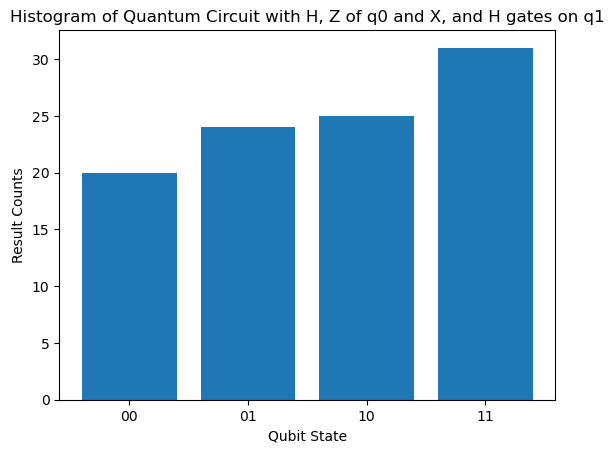

In [36]:
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    qml.PauliX(wires=1)
    qml.Hadamard(wires=1)
    return qml.counts()

counts = circuit(shots=100)

# Plot histogram
plt.bar(counts.keys(), counts.values())
plt.title('Histogram of Quantum Circuit with H, Z of q0 and X, and H gates on q1')
plt.xlabel('Qubit State')
plt.ylabel('Result Counts')
plt.show()

##### $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$

Statevector:  [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]

Circuit
(<Figure size 500x300 with 1 Axes>, <Axes:>)


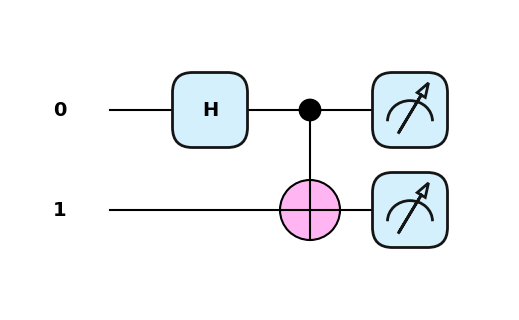

In [20]:
# run on simulator device 'default.qubit'
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()

# Print statevector
statevector = circuit()
print("Statevector: ",  statevector)

print("\nCircuit")
drawer = qml.draw_mpl(circuit)
qml.drawer.use_style('pennylane')
print(drawer())

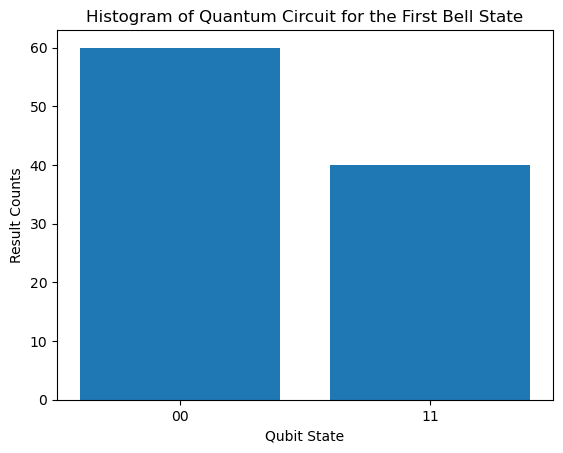

In [37]:
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.counts()

counts = circuit(shots=100)

# Plot histogram
plt.bar(counts.keys(), counts.values())
plt.title('Histogram of Quantum Circuit for the First Bell State')
plt.xlabel('Qubit State')
plt.ylabel('Result Counts')
plt.show()

##### $\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$

Statevector:  [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]

Circuit
(<Figure size 600x300 with 1 Axes>, <Axes:>)


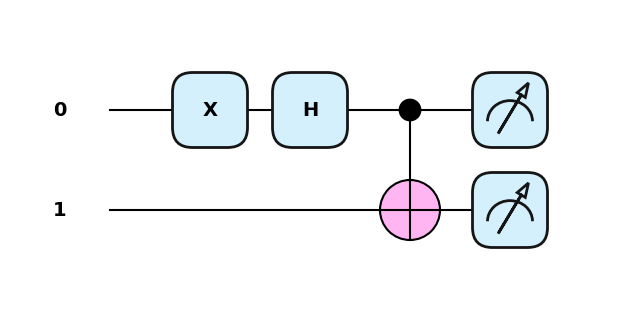

In [22]:
# run on simulator device 'default.qubit'
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit():
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()

# Print statevector
statevector = circuit()
print("Statevector: ",  statevector)

print("\nCircuit")
drawer = qml.draw_mpl(circuit)
qml.drawer.use_style('pennylane')
print(drawer())

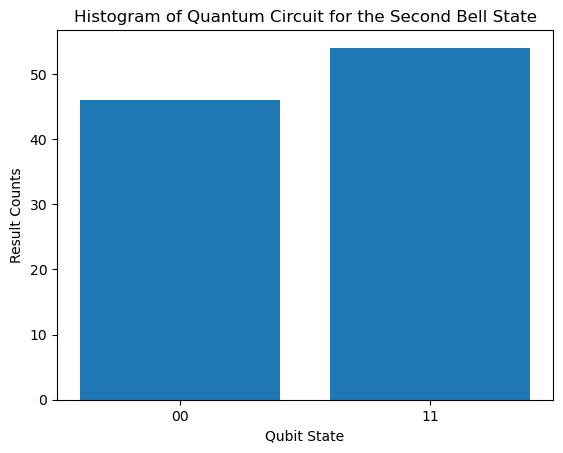

In [38]:
@qml.qnode(dev)
def circuit():
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.counts()

counts = circuit(shots=100)

# Plot histogram
plt.bar(counts.keys(), counts.values())
plt.title('Histogram of Quantum Circuit for the Second Bell State')
plt.xlabel('Qubit State')
plt.ylabel('Result Counts')
plt.show()

##### $\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$

Statevector:  [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]

Circuit
(<Figure size 500x300 with 1 Axes>, <Axes:>)


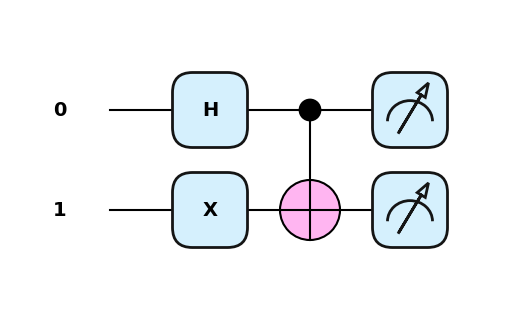

In [24]:
# run on simulator device 'default.qubit'
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit():
    qml.PauliX(wires=1)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()

# Print statevector
statevector = circuit()
print("Statevector: ",  statevector)

print("\nCircuit")
drawer = qml.draw_mpl(circuit)
qml.drawer.use_style('pennylane')
print(drawer())

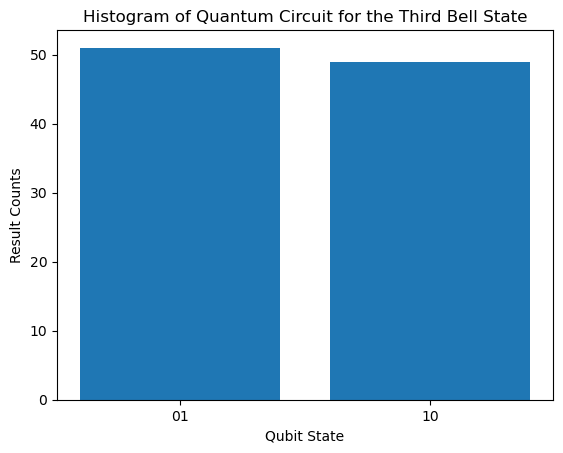

In [39]:
@qml.qnode(dev)
def circuit():
    qml.PauliX(wires=1)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.counts()

counts = circuit(shots=100)

# Plot histogram
plt.bar(counts.keys(), counts.values())
plt.title('Histogram of Quantum Circuit for the Third Bell State')
plt.xlabel('Qubit State')
plt.ylabel('Result Counts')
plt.show()

##### $\frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$

Statevector:  [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]

Circuit
(<Figure size 600x300 with 1 Axes>, <Axes:>)


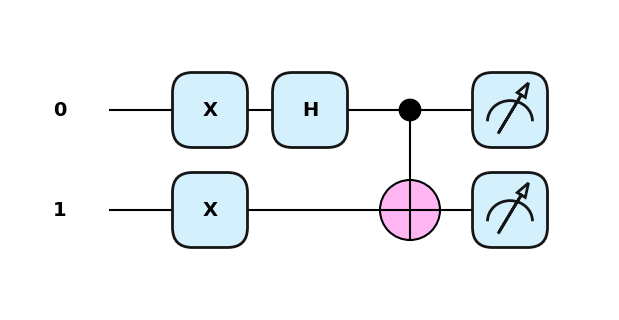

In [26]:
# run on simulator device 'default.qubit'
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit():
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()

# Print statevector
statevector = circuit()
print("Statevector: ",  statevector)

print("\nCircuit")
drawer = qml.draw_mpl(circuit)
qml.drawer.use_style('pennylane')
print(drawer())

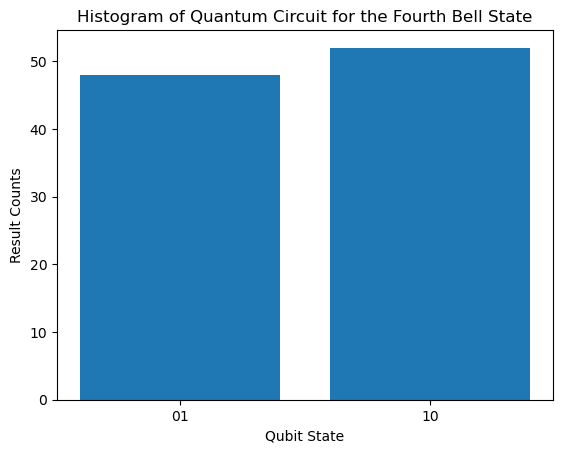

In [40]:
@qml.qnode(dev)
def circuit():
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.counts()

counts = circuit(shots=100)

# Plot histogram
plt.bar(counts.keys(), counts.values())
plt.title('Histogram of Quantum Circuit for the Fourth Bell State')
plt.xlabel('Qubit State')
plt.ylabel('Result Counts')
plt.show()

### 3) Using the parametrized QISkit circuit for quantum teleportation, investigate whether any arbitrary payload qubit can be teleported.

First try a few states with complex amplitudes and/or rotation angles and compare the resulting state with the payload state vector.

Then describe mathematically how the state vector of the system evolves from the Bell state $|q_Aq_B\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ and arbitrary payload state $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$ to the final state; argue why Bob has to apply $X$ and $Z$ gates depending on the outcome of Alice's measurements of her qubits.

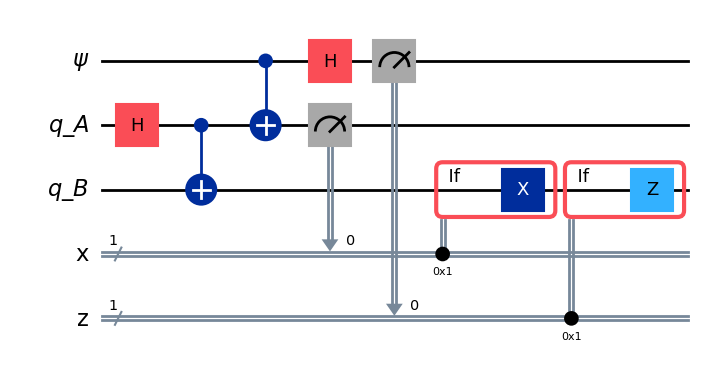

In [28]:
from qiskit import QuantumRegister, ClassicalRegister

psi, qA, qB = QuantumRegister(1, name='\psi'), QuantumRegister(1, name='q_A'), QuantumRegister(1, name='q_B')
x, z = ClassicalRegister(1, name='x'), ClassicalRegister(1, name='z')
qc = QuantumCircuit(psi, qA, qB, x, z)

qc.h(1)
qc.cx(1, 2)
qc.cx(0, 1)
qc.h(0)
qc.measure([1, 0], [0, 1])
with qc.if_test((x, True)) as _:
    qc.x(2)
with qc.if_test((z, True)) as _:
  qc.z(2)

qc.draw(output='mpl')

Assuming the payload is already in state $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$ and after setting up the Bell state $|q_Aq_B\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ with the first $H$ and $CX$ gates, we have
$$ |\psi\rangle \otimes |q_Aq_B\rangle = \frac{\alpha}{\sqrt{2}} |000\rangle + \frac{\beta}{\sqrt{2}} |100\rangle + \frac{\alpha}{\sqrt{2}} |011\rangle + \frac{\beta}{\sqrt{2}} |111\rangle. $$
We then apply the $CX$ gate conditioned on $\psi$ to obtain
$$ \frac{\alpha}{\sqrt{2}} |000\rangle + \frac{\beta}{\sqrt{2}} |110\rangle + \frac{\alpha}{\sqrt{2}} |011\rangle + \frac{\beta}{\sqrt{2}} |101\rangle. $$
Next, applying the $H$ gate on $\psi$, we obtain
$$ \frac{\alpha}{2} (|0\rangle + |1\rangle)|00\rangle + \frac{\beta}{2} (|0\rangle - |1\rangle)|10\rangle + \frac{\alpha}{2} (|0\rangle + |1\rangle)|11\rangle + \frac{\beta}{2} (|0\rangle - |1\rangle)|01\rangle $$
and finally regrouping,
$$ \frac{1}{2} |00\rangle (\alpha |0\rangle + \beta |1\rangle) + \frac{1}{2} |01\rangle (\beta |0\rangle + \alpha |1\rangle) + \frac{1}{2} |10\rangle (\alpha |0\rangle - \beta |1\rangle) + \frac{1}{2} |11\rangle (-\beta |0\rangle + \alpha |1\rangle). $$
Hence, we then measure $\psi$ and $q_A$ and based on the measurements, apply...
$$ \begin{align*} 00 &= I \\ 01 &= X \\ 10 &= Z \\ 11 &= XZ \end{align*} $$
to $q_B$ to recover $\psi$. 